In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADSK', 'AMD', 'AMZN', 'ANET', 'APPH', 
    'AXON', 'BBY','BROS', 'BYND', 'CHWY', 'COIN', 'COUR', 'CRWD',
    'DDOG', 'DKNG', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'EVGO', 'FTCH',
    'FUV', 'FVRR', 'GH', 'GMED', 'GOOG', 'INTG', 'ISRG', 'JD', 'LSPD',
    'LULU','MDB', 'MEDP', 'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR',
    'NVDA', 'NYT', 'OKTA', 'OPEN', 'PANW', 'PINS', 'PTON', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'ROKU', 'SE', 'SHOP', 'SOLO', 'SPLK', 'SQ',
    'TASK', 'TDOC', 'TEAM', 'TREX', 'TTD', 'TTWO', 'TWLO', 'TWTR',
    'UPST', 'VEEV', 'WK', 'XPEV', 'ZEN', 'ZNGA']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)
len(SYMBOLS)

72

In [3]:
N_YEARS = 5
N_DAYS = int(round(365.25 * N_YEARS))
TODAY = (datetime.now() + timedelta(1)).date()
START = str(TODAY - timedelta(N_DAYS))
START, TODAY

('2017-01-21', datetime.date(2022, 1, 21))

In [4]:
batch = SYMBOLS + INDICES # run all
stock_loader = Loader(batch, START, verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  75 of 75 completed
Generating derived columns...
   ...AAPL
   ...ABMD
   ...ABNB
   ...ADSK
   ...AMD
   ...AMZN
   ...ANET
   ...APPH
   ...AXON
   ...BBY
   ...BROS
   ...BYND
   ...CHWY
   ...COIN
   ...COUR
   ...CRWD
   ...DDOG
   ...DKNG
   ...DOCU
   ...DUOL
   ...EDIT
   ...ETSY
   ...EVGO
   ...FTCH
   ...FUV
   ...FVRR
   ...GH
   ...GMED
   ...GOOG
   ...INTG
   ...ISRG
   ...JD
   ...LSPD
   ...LULU
   ...MDB
   ...MEDP
   ...MELI
   ...MNST
   ...MSFT
   ...MTCH
   ...NVCR
   ...NVDA
   ...NYT
   ...OKTA
   ...OPEN
   ...PANW
   ...PINS
   ...PTON
   ...QDEL
   ...RBLX
   ...RDFN
   ...RGEN
   ...ROKU
   ...SE
   ...SHOP
   ...SOLO
   ...SPLK
   ...SQ
   ...TASK
   ...TDOC
   ...TEAM
   ...TREX
   ...TTD
   ...TTWO
   ...TWLO
   ...TWTR
   ...UPST
   ...VEEV
   ...WK
   ...XPEV
   ...ZEN
   ...ZNGA
   ...^GSPC
   ...^IXIC
   ...^NYA


In [5]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.006565
2       1.008026
3       0.999265
4       0.999134
5       0.993990
          ...   
1253    1.002818
1254    0.985756
1255    1.000820
1256    0.981612
1257    0.990310
Name: ^GSPC, Length: 1257, dtype: float64

In [6]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.014580
2,1.014964
3,1.003553
4,1.007896
5,0.999382
...,...
1253,1.009513
1254,0.976436
1255,1.008793
1256,0.976364


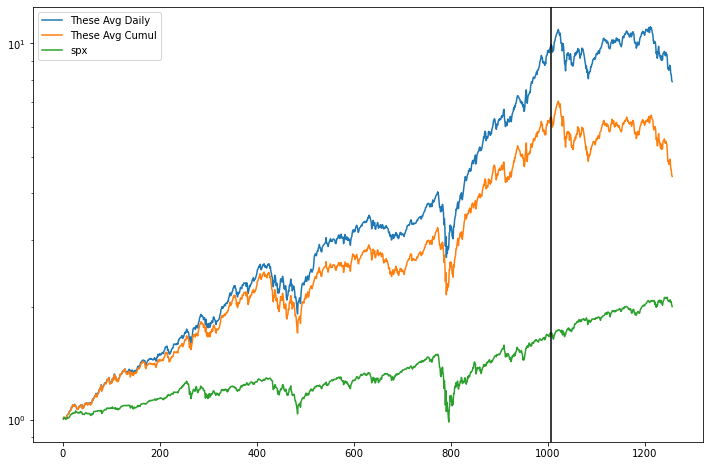

In [7]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
#plt.plot(data['DayToDayChange']
#         .quantile(q=[0.52], axis=1)
#         .T[1:]
#         .cumprod(), 
#         label='52')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

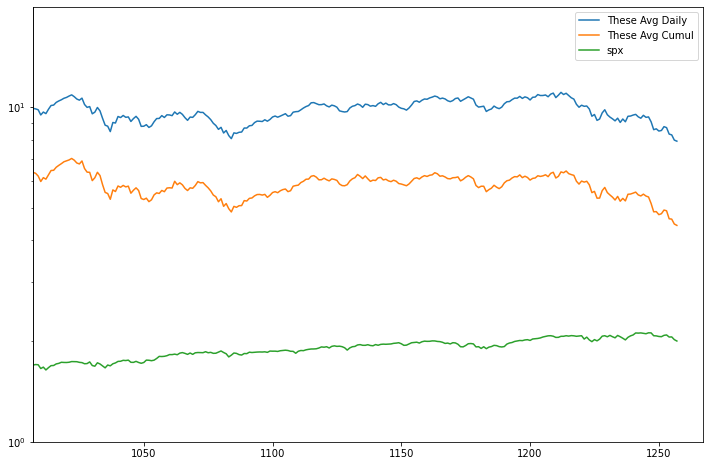

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
         label='These Avg Daily')
plt.plot(data['DayToDayChange'].cumprod().mean(axis=1),
         label='These Avg Cumul')
#plt.plot(data['DayToDayChange']
#         .quantile(q=[0.52], axis=1)
#         .T[1:]
#         .cumprod(), 
#         label='52')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim([10 ** 0, 10 ** 1.3])
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()]
                   .index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [10]:
rblx = get_stock_data('SE', data)
rblx.head()

,Value,Close,High,Low,Open,LogValue,IntradayChange,DayToDayChange,OvernightChange
189,16.26,16.26,16.990,14.00,16.25,2.788708,1.000615,NaN,NaN
190,15.26,15.26,16.399,15.12,16.10,2.725235,0.947826,0.938499,0.990160
191,15.24,15.24,15.860,14.77,15.40,2.723924,0.989610,0.998689,1.009174
192,13.73,13.73,15.430,13.62,15.10,2.619583,0.909271,0.900919,0.990814
193,14.02,14.02,14.160,13.81,13.82,2.640485,1.014472,1.021122,1.006555


In [11]:
rblx = rblx[['Value', 'Close', 'High', 'Low']]
rblx.head()

,Value,Close,High,Low
189,16.26,16.26,16.990,14.00
190,15.26,15.26,16.399,15.12
191,15.24,15.24,15.860,14.77
192,13.73,13.73,15.430,13.62
193,14.02,14.02,14.160,13.81


In [12]:
rblx['NextHigh'] = rblx.High.shift(-1)
rblx['NextLow'] = rblx.Low.shift(-1)
rblx['HighMult'] = rblx.NextHigh / rblx.Close
rblx['LowMult'] = rblx.NextLow / rblx.Close
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult
189,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889
190,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890
191,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701
192,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827
193,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308


0.05    0.991246
Name: HighMult, dtype: float64


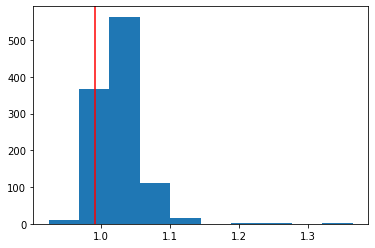

In [13]:
# For selling:
high_05 = rblx.HighMult.quantile(q=[0.05])
print(high_05)
plt.hist(rblx.HighMult)
plt.axvline(x=high_05[0.05], color='red');

1.0132332753928674


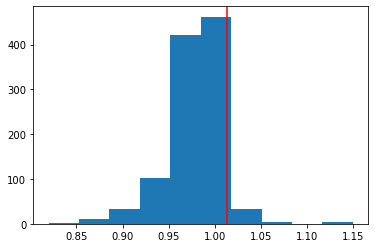

In [14]:
# For buying:
low_95 = rblx.LowMult.quantile(q=[0.95])
print(low_95.tolist()[0])
plt.hist(rblx.LowMult)
plt.axvline(x=low_95[0.95], color='red');

In [15]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [16]:
get_hilo_mult(rblx)

(1.0132332753928674, 0.991246167712097)

In [17]:
aapl = get_stock_data('AAPL', data)
get_hilo_mult(aapl)

(1.0094902711870617, 0.9934616246200441)

In [18]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [19]:
rblx['Trend'] = get_macd(rblx)
rblx.head()

,Value,Close,High,Low,NextHigh,NextLow,HighMult,LowMult,Trend
189,16.26,16.26,16.990,14.00,16.399,15.12,1.008549,0.929889,0
190,15.26,15.26,16.399,15.12,15.860,14.77,1.039318,0.967890,0
191,15.24,15.24,15.860,14.77,15.430,13.62,1.012467,0.893701,0
192,13.73,13.73,15.430,13.62,14.160,13.81,1.031318,1.005827,0
193,14.02,14.02,14.160,13.81,14.130,13.80,1.007846,0.984308,0


In [20]:
def get_hilo_mults(stock, ci=0.95):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    sell_pt_up = upward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_up = upward.LowMult.quantile(q=[ci]).tolist()[0]
    sell_pt_down = downward.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt_down = downward.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt_up, sell_pt_up, buy_pt_down, sell_pt_down

In [21]:
get_hilo_mults(rblx)

(1.0096799046604572,
 0.9923027060379354,
 1.0174170953918242,
 0.9890877655999913)

In [22]:
get_hilo_mults(aapl)

(1.00812495132934, 0.9963188736068973, 1.0107528190606705, 0.9891643005826722)

In [23]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock', 'buy_pt_up', 'sell_pt_up', 'buy_pt_down', 
             'sell_pt_down'])
df.head()

,stock,buy_pt_up,sell_pt_up,buy_pt_down,sell_pt_down
0,AAPL,1.008125,0.996319,1.010753,0.989164
1,ABMD,1.004818,0.997466,1.005960,0.996720
2,ABNB,1.005371,0.994804,1.010876,0.983219
3,ADSK,1.005135,0.996968,1.008537,0.992719
4,AMD,1.013701,0.993499,1.013849,0.991061


In [24]:
df.to_csv('mults.csv', index=False)
!open ./mults.csv